# Data Analysis and visualization of no show appointments

**Questions**

Which neighborhood had the most people enrolled in the appointment?

The number of males and females that showed and up and those that didn't show up for the appointment?

The Neighborhood in which most people showed up?

Age of the people who showed up for appointment?

The number of days one had to wait in order to show up or not show up for appointment?

## Importing Libraries

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [51]:
df = pd.read_csv('kaggleV2-May-2016.csv')

In [52]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#‘ScheduledDay’ tells us on what day the patient set up their appointment.

#‘Neighborhood’ indicates the location of the hospital.

#Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

# ‘No’ if the patient showed up to their appointment,and ‘Yes’ if they did not show up.


In [53]:
df.shape

(110527, 14)

In [6]:
#What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## Data Cleaning

### Checking for missing values and Duplicates

In [55]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [56]:
df.duplicated().sum()

0

The Data is clean with no missing values and duplicates

### checking for datatypes

In [57]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [58]:
#checking for unique values of the columns

In [59]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [60]:
#unique values
columns = ['Gender','Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


for i in columns:
    print(i, '-->')
    print(df[i].value_counts())
    print('----------------------------')

Gender -->
F    71840
M    38687
Name: Gender, dtype: int64
----------------------------
Scholarship -->
0    99666
1    10861
Name: Scholarship, dtype: int64
----------------------------
Hipertension -->
0    88726
1    21801
Name: Hipertension, dtype: int64
----------------------------
Diabetes -->
0    102584
1      7943
Name: Diabetes, dtype: int64
----------------------------
Alcoholism -->
0    107167
1      3360
Name: Alcoholism, dtype: int64
----------------------------
Handcap -->
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
----------------------------
SMS_received -->
0    75045
1    35482
Name: SMS_received, dtype: int64
----------------------------
No-show -->
No     88208
Yes    22319
Name: No-show, dtype: int64
----------------------------


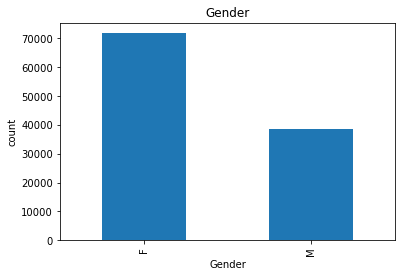

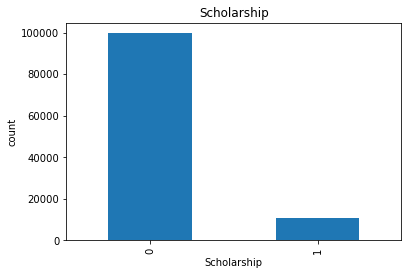

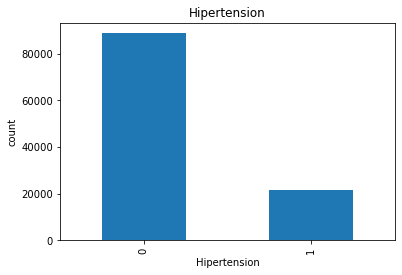

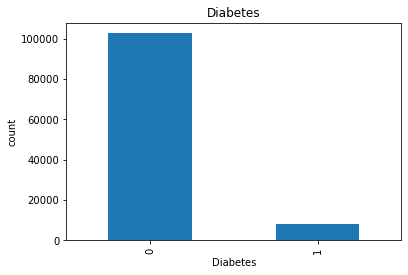

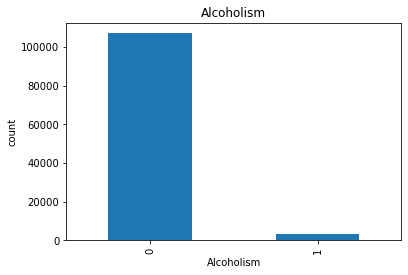

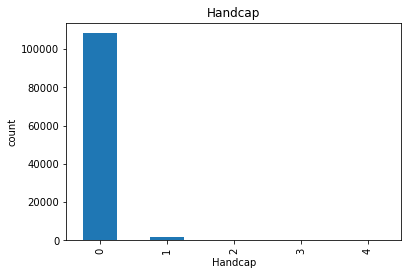

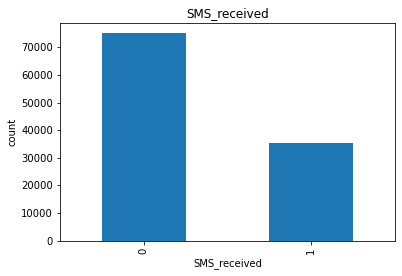

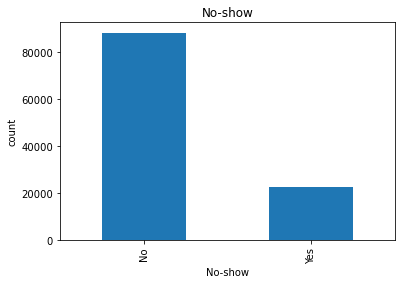

In [61]:
for i in columns:
    plt.title(i)
    df[i].value_counts().plot(kind='bar')
    plt.ylabel('count')
    plt.xlabel(i)
    plt.show()

Gender : Most females are enrolled for appointment as compared to men

scholarship: Most patients are not enrolled in the brasilia welfare

Diabetes: Most patients did not have diabetes

Alcoholism: Most patients are non alcoholic

Showing: Most people show up for appointment

**Neighbourhood**

which neighbourhood have most patients enrolled for appointment?

In [43]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

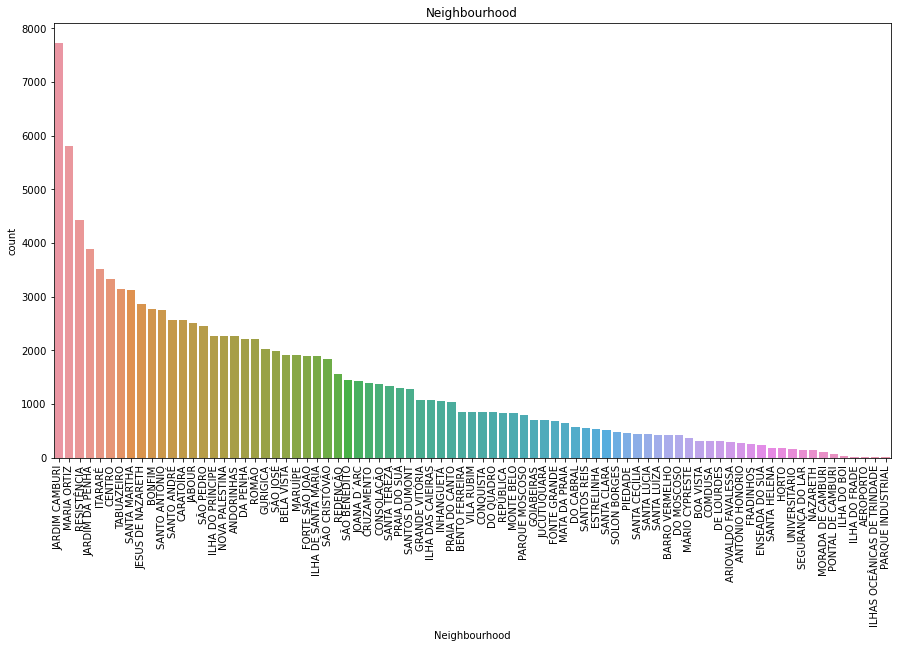

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x='Neighbourhood',data = df, order = df['Neighbourhood'].value_counts().index )
plt.title('Neighbourhood')
plt.xticks(rotation=90)
plt.show()

JARDIM CAMBURI has most people enrolled in for appointments while ILHAS OCEÂNICAS DE TRINDADE  and PARQUE INDUSTRIAL have the least

**Analyzing No-show**

In [44]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

88208 individuals showed up for appointment

22319 individuals didn't show up for appointment

**Deep Dive**

**Creating a dataframe for those who showed up and those that didn't**

In [45]:
#creating mask for no show
df_yes_show = df[df['No-show']=='No']
df_no_show = df[df['No-show']=='Yes']

counting those who did not showed up in terms of gender, scholarship, hypertension, diabetes, alcoholism, handcap, sms-received

In [46]:
columns = ['Gender','Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


for i in columns:
    print(i, '-->')
    print(df_no_show[i].value_counts())
    print('----------------------------')

Gender -->
F    14594
M     7725
Name: Gender, dtype: int64
----------------------------
Scholarship -->
0    19741
1     2578
Name: Scholarship, dtype: int64
----------------------------
Hipertension -->
0    18547
1     3772
Name: Hipertension, dtype: int64
----------------------------
Diabetes -->
0    20889
1     1430
Name: Diabetes, dtype: int64
----------------------------
Alcoholism -->
0    21642
1      677
Name: Alcoholism, dtype: int64
----------------------------
Handcap -->
0    21912
1      366
2       37
3        3
4        1
Name: Handcap, dtype: int64
----------------------------
SMS_received -->
0    12535
1     9784
Name: SMS_received, dtype: int64
----------------------------


Most females did not show up

**Neighbourhood with most people that turned up**

In [47]:
def visualize_count(df,x,title):
    plt.figure(figsize=(15,8))
    sns.countplot(x=x,data=df,order=df[x].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

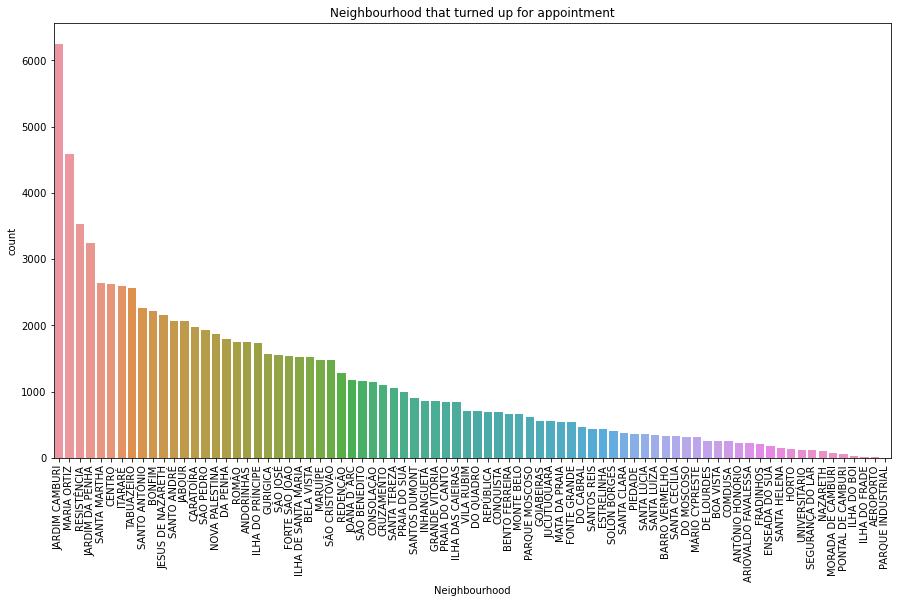

In [48]:
visualize_count(df_yes_show,'Neighbourhood','Neighbourhood that turned up for appointment')

Jardim camburi, maria oritz neighborhoods lead in the number of people that did turn up for appointment

**Neighbourhood with most people that didn't turn up for appointment**

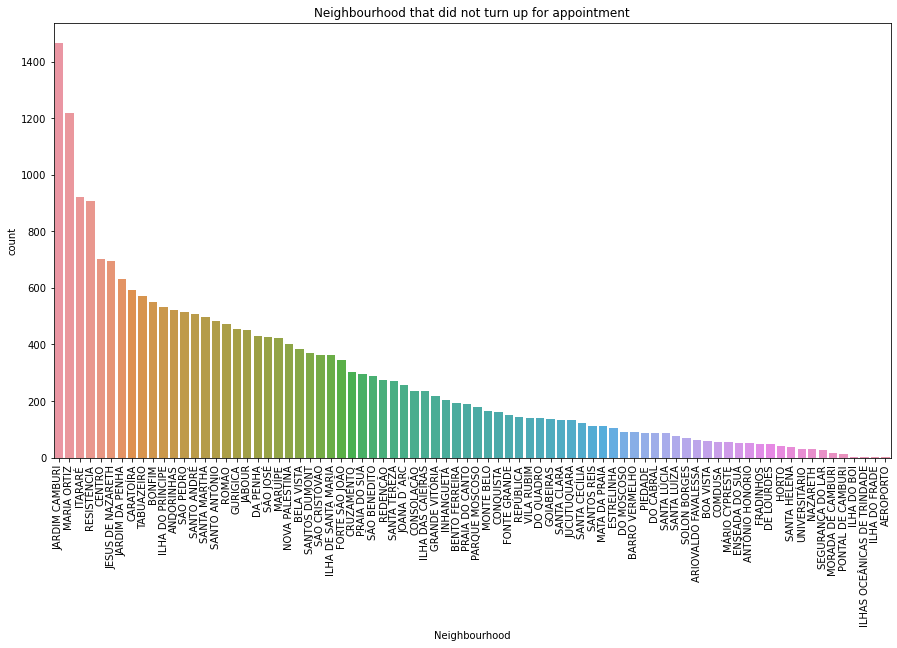

In [49]:
visualize_count(df_no_show,'Neighbourhood','Neighbourhood that did not turn up for appointment')

Like wise it seems also Jardim camburi, maria oritz neighborhoods lead in the number of people that didn't turn up for appointment

**Age of those who showed up and and those who didn't**

**Create a function**

In [13]:
def visual_show_age(data1,data2,label1,label2):
    fig,ax = plt.subplots(figsize=(8,6))
    ax.hist(data1,alpha=0.5,label = label1)
    ax.hist(data2,alpha=0.5,label = label2)
    ax.set_xlabel('Age')
    ax.set_ylabel('count')
    ax.legend(loc='upper right')
    plt.show()
    

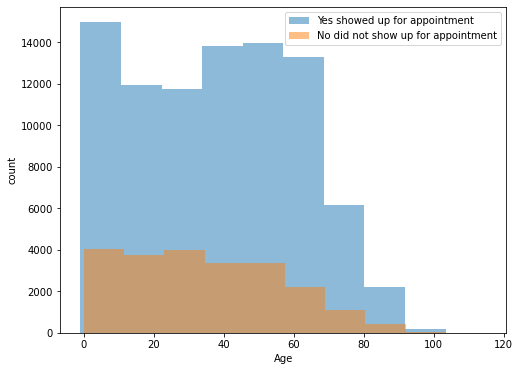

In [14]:
#visualizing age of those who show up and those who dont
visual_show_age(df_yes_show['Age'],df_no_show['Age'],'Yes showed up for appointment','No did not show up for appointment')

In [6]:
#creating a mask for males and females
df_Female = df.query('Gender == "F" ')
df_Male = df.query('Gender == "M"')

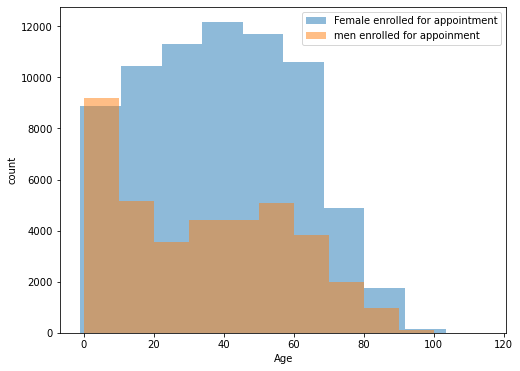

In [15]:
#visualizing age of females and males enrollment
visual_show_age(df_Female['Age'],df_Male['Age'],'Female enrolled for appointment','men enrolled for appoinment')

In [24]:
# convert the scheduled day and appointment day to date time

In [17]:
df['scheduled_day'] = pd.to_datetime(df['ScheduledDay'])
df['appointment_day'] = pd.to_datetime(df['AppointmentDay'])

In [18]:
df['appointment_week'] = df['appointment_day'].dt.weekday
df['day_of_appointment'] = df['appointment_day'].dt.dayofyear
df['month_of_appointment'] = df['appointment_day'].dt.month

In [19]:
df['scheduled_week'] = df['scheduled_day'].dt.weekday
df['day_of_schedule'] = df['scheduled_day'].dt.dayofyear
df['scheduled_month'] = df['scheduled_day'].dt.month

**Difference between schedule days and appointments**

>So as to determine the number of months people had to wait inorder to not show up or show up

In [20]:
df['wait_months'] = df['month_of_appointment'] - df['scheduled_month']

In [23]:
#creating mask for no show
df_yes_show = df[df['No-show']=='No']
df_no_show = df[df['No-show']=='Yes']

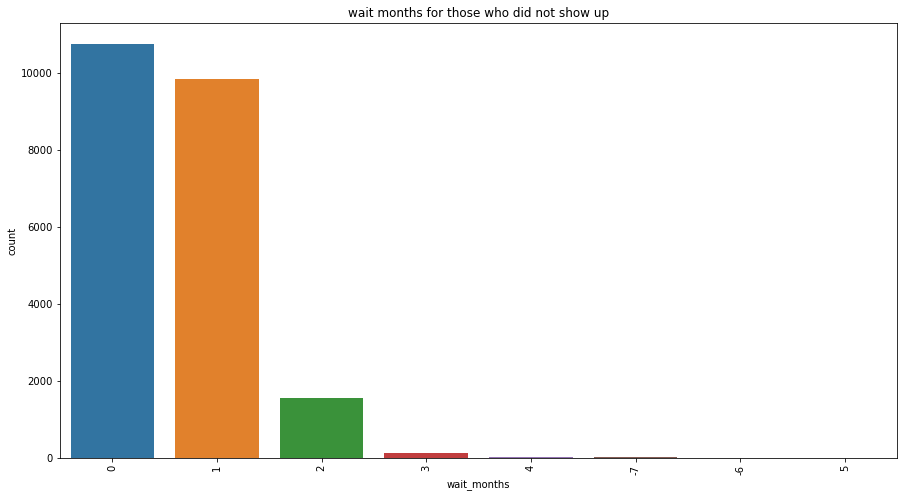

In [24]:
visualize_count(df_no_show,'wait_months','wait months for those who did not show up')

>most people that didn't show up had a waiting time of less than  a month

>We can also see those that who had a waiting span of one month didn't show up

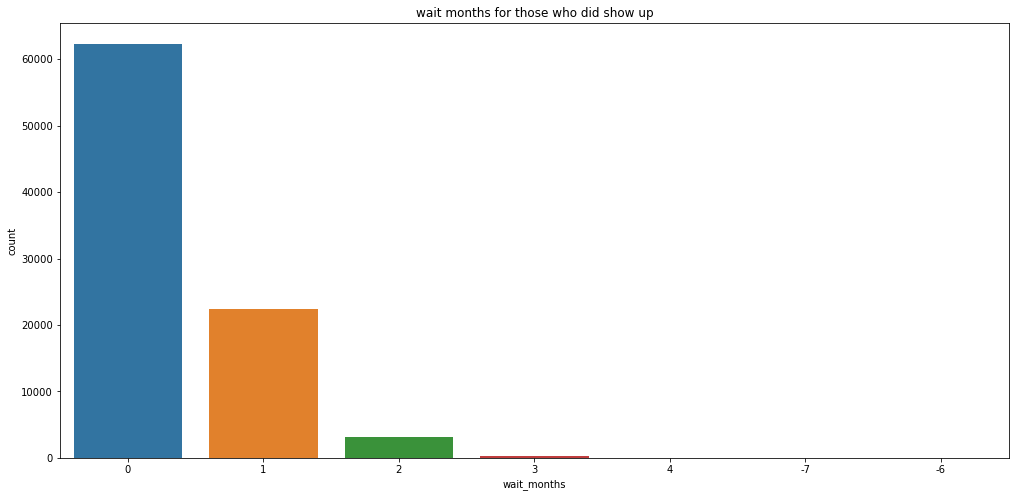

In [32]:
visualize_count(df_yes_show,'wait_months','wait months for those who did show up')

>Most of the people that did show up  had less than a month to wait

# Conclusions

Neighbohood has a great contribution to show up rate and Jardim camburi leads

Age affects show up rate

Most people that did show had less than a month to wait

# limitations 

We only have data for three months

Distance from neighbourhood to the hospital is not given which may prove to be very effective in determining neighbourhoods which are far away from hospital.